# Project Group - 32

Members: Julia van Berkom, David Wolfrat, Tanja de Bruin, Mischa de Gooijer

Student numbers: 4797116, 4912713, 6062687, 4836553

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Research Question: What is the impact of the two additional traintracks that are being built in Delft on the capacity of the route Rotterdam Centraal and Den Haag Hollands Spoor?

Research Objective: Find out what the impact is of the two additional traintracks that are being built in Delft on the capacity of the route Rotterdam Centraal and Den Haag Hollands Spoor by using data of the NS and ProRail to program a model.

The plan is to try and model the current and future situation on the train route through Delft. To do this, the current situation will be analysed through the use of data on disruptions and delays. This is the data processing part of the project. Then we will build a simulation of the train route between Rotterdam Centraal and Den Haag HS. We will first check the accuracy of the simulation through the use of the real world data on the current situation. Then we will analyse the future situation. Finally, we can compare the future situation to the current situation.


# Contribution Statement

**Julia van Berkom**: coding, data analysis, conceptualisation

**David Wolfrat**: coding, data modelling

**Tanja de Bruin**: coding, background research, visualisation

**Mischa de Gooijer**: coding, data modelling, visualisation

# Data Used

To do:
-contribution statement invullen
-move latex text to this notebook
-Intro met situatieschetsen (motiveer de keuze voor onderwerp en motiveer waarom Panchamy dit wil lezen)
-onderzoeksvraag
-wat zijn de datasets en hoe komen we eraan
-"approach": hoe gaan we de onderzoeksvraag beantwoorden?
        -hoe gaan wij deze situaties in een code implementeren?
-analyse van de resultaten, grafieken:
        -de sporen met treintjes op bepaalde tijdsstappen
        -grafieken van NS vertraging: zoom in op vertragingen die wij ook in ons model kunnen hebben (stilstaande trein, werk aan spoor) (taartgrafiek)
        -uit ons 'oude' model blijkt inderdaad dat dit de vertraging is (getal)
        -met het toevoegen van extra sporen is dit de vertraging (getal)
        -met bar charts: gemiddelde toegestande duur reis, deze treinen gaan daarboven, deze treinen zijn wel op tijd, hieruit blijkt blabla
        -hiermee is de capaciteit van treinen op spoor verhoogd van X naar y (bar chart)
        -de capaciteit aan mensen is dan verhoogd van x naar y (bar chart)
-conclusie
-discussie and future recommendations


# Introduction

Since 2018 ProRail has been building additional train tracks between Rijswijk and Schiedam, to facilitate more capacity and less delay on this route from 2024 onward. In comparison with the current timetable, this project aims to show an optimized situation when the additional train tracks will be opened. Information used to evaluate the new rail system, will be the capacity on the route between Den Haag Hollands Spoor and Rotterdam Central. Capacity will be based on the capacity on the tracks: the amount and type of trains able to use the track and the capacity for people wanting to use the route.

To examine the research objective, a time period between 16.00 and 18.00 on a Thursday was selected and denoted the current timetable. This is the base situation for which a more optimal usage with two additional tracks is modelled.

Background for the model is the information given by ProRail on where the additional train tracks would be built. The Dutch Railway company (NS) provided the current timetable. From information provided by the NS it is derived that approximately 78.000 people make daily use of the train track between Den Haag Hollands Spoor and Rotterdam Central. About 18 per cent of daily travellers use the route during afternoon rush hour. Resulting in 14.040 passengers between 16.00 and 18.00. 
In this time period, the average amount of seated places in a sprinter is 496, and in an intercity the average amount of seated places is 800. The current total capacity on the route between 16.00 and 18.00 is 1.984 in sprinters and 9.600 in intercity trains, these are all seated places. Resulting in a shortage of 2.456 seated places on the route, assuming passengers will make no difference in taking a sprinter or intercity train. Which in reality will not be the case. 

The geographical distances between the stations and the location of the switches is used to model the network. This makes the model an accurate representation of the real-life scenario. And provides a solid basis for scenario 2 with the additional tracks.

In both scenarios, the trains are modelled to depart at the time given in the timetable. The trains keep at least a minimum distance to the train before them. In scenario 2 the trains are not obligated to stick to their starting track and when a switch appears they will asses which track is the most beneficial for them. If it is more beneficial to use the track with fewer trains, the train will, when there is a gap, switch to the other track. There is no limit on how many times a train is allowed to switch tracks. At the locations where the double track becomes single track again, trains not on the main track will have to wait until there is enough space on the main track to fit, while still complying with the required safety distance.

In essence, the significance of this modeling project lies in its ability to predict and analyze the utilization of the additional train tracks. By addressing the specific challenges of this busy route during peak hours, the model could serve as a tool for ProRail and other stakeholders to make informed decisions, ultimately leading to an enhanced commuter experience, improved capacity, and reduced delays.

In the graphs below the delays between Den haag Hollands Spoor and Rotterdam Central of the past 2 year are shown. With the new system, some of the causes won't be as influencial as they are now. Delays categorised by 'broken down train' and 'defective railway track' could be reduced if there is an additional track that can still function in these scenarios. The results of our model will focus on causes of delay, in which the railway company is responsible. It is not feasible in the scope of this course, to take external influences in account. The code leading to below graphs can be found in the file dataframe_phyton.py. 

# The Base Model

To compare the current situation of the tracks with the future scenario, two model were created: a base model physical_elements and the adapted model physical_elements_new_situation. First, the base model will be explained.

The model begins by importing necessary libraries and defining the railway network and train data such as the routes, switch points and speeds. Then, the TRAIN Class is created. This Class is defined to represent individual trains; either an Intercity or a Sprinter train. It includes attributes such as train ID, train type, location of the train, direction, potential switching points, speed, and track number. This Class entails a number of functions:
- The move function is responsible for moving trains in each time step. It considers the distance to the next station or switch point, checks for space on the tracks, and updates the train's location accordingly.
- The station_reached function is used when a train reaches a station. If the station is the end station, the train is removed from the dictionary keeping track of all 'active' trains.
- The track_switch function determines whether a train switches tracks based on the current track's occupancy compared to a potential new track.
- The double_track function checks if there are two tracks in the same direction after a switch, as the amount of tracks can differ per segment and a train should not switch to empty space.
- The train_creator function creates a train using the TRAIN class according to the timetable of the NS, retrieved from file Departures_HS_to_Rdam or Departures_Rdam_to_HS. From this data, it also hatches the starting location and direction.
- The run_simulation function initiates the simulation by iterating through time steps of 30 seconds, creating trains at their departure times, and advancing trains using the move function.

To report the behaviour of the train agents, a few extra functions are implemented:
- data_converter and data_converter_delay convert the train data into the correct format for visualization. The former is for the train positions on the tracks, and the latter is for delay analysis.
- The final output consists of two lists: visualization_output contains the train positions at each time step, and delay_output contains the location of all trains at each time step, suitable for delay analysis.
- The model prints the visualization_output and delay_output at the end of the simulation.

# New situation model

The second model, which represents the future situation where more segments have double tracks in each direction, is an adapted version of the base model physical_elements. The Agents and functions are identical, except that all agents have more options in switching tracks if their current track has a high occupance. 

# Visualisation

The jupyter notebooks Render_Map and Render_Map_newsitu simulate the movement of the trains using the functions 'simulate'. This function needs three inputs: a graph representing a railway network, the positions of various elements in the network, and a list describing where trains are at different times. Using HoloViews and Bokeh, the function creates an interactive graph that visually represents how trains move along the tracks over timesteps of 30 seconds. It starts by turning the railway network into a HoloViews graph, adding tooltips for details. Then, it compiles a dictionary to track train locations at different moments. Finally, it combines the train movement with the railway network, resulting in an animated visualization, operated by a toggle.

There are two functions, "railway_network_current" and "railway_network_current_holo," that define the structure of the railway network using NetworkX. They specify nodes for stations, switches, platforms, and virtual switches, and edges to represent tracks connecting them. 

Another important function, "get_node_dict," extracts the positions of nodes from a given network and organizes them into a dictionary, to be able to place them in the visualisation.

The script then creates instances of the railway network using these functions and extracts node positions. The variable, "train_locations_2," is the input data for train locations. The actual data needs to be provided before running the simulation.

Finally, the last line, "map," is used to present the plot.

Running the Base Model physical_elements, the following graphics are created:
(The harsh blue dots represent stations and switches, the smaller blue dots represent the trains.)

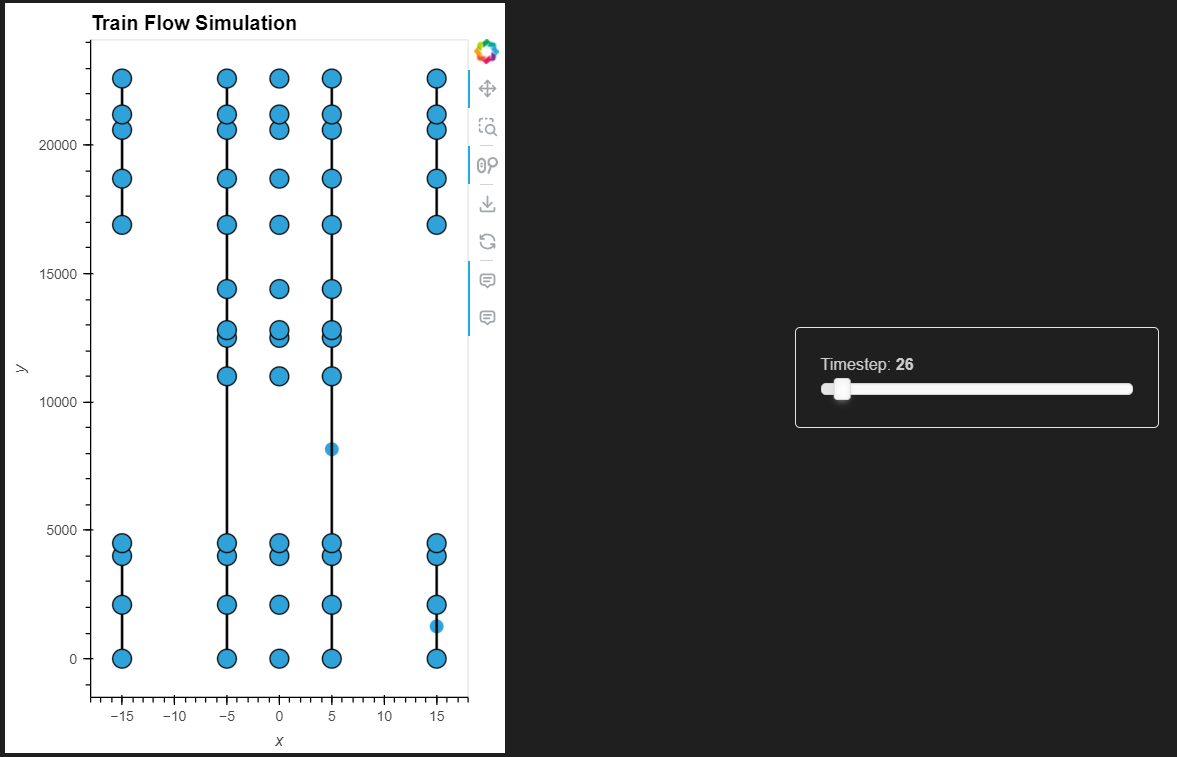

Here it can be seen that the train on the most right track switches to the track on the left as the agents foresees the ending of the track:
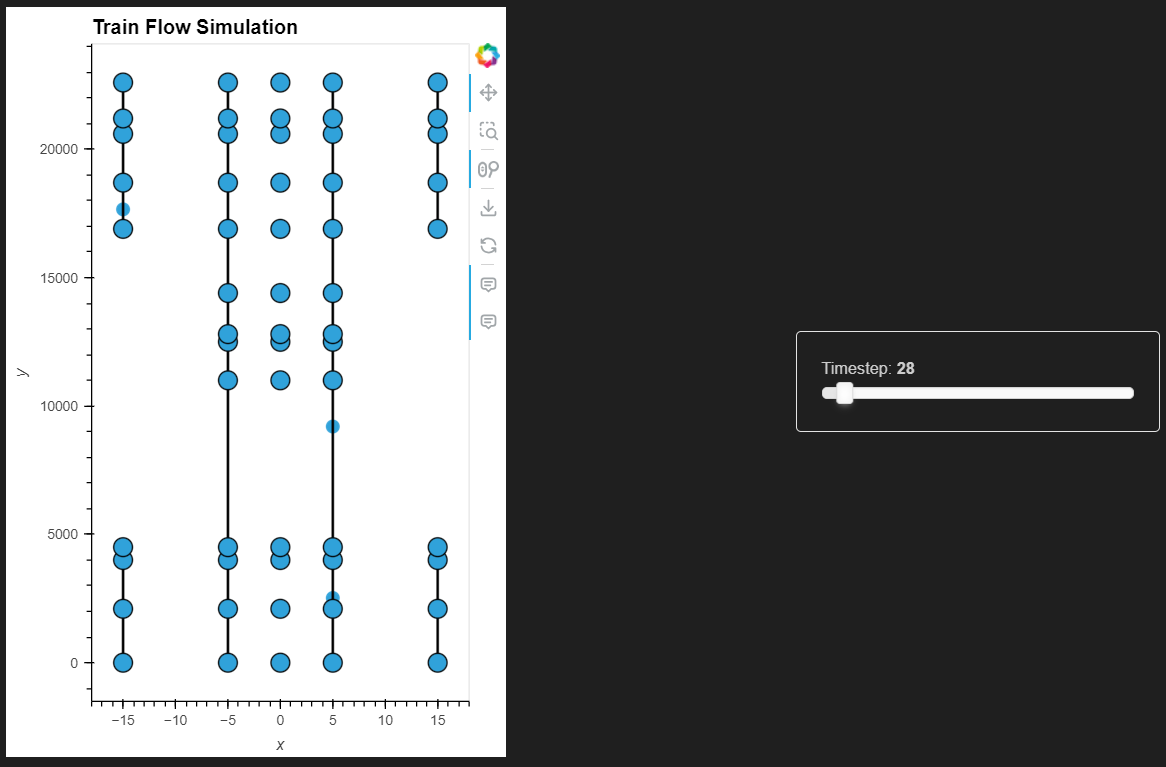



Between timestep 190 and 196, it can be seen that most trains do switch tracks:


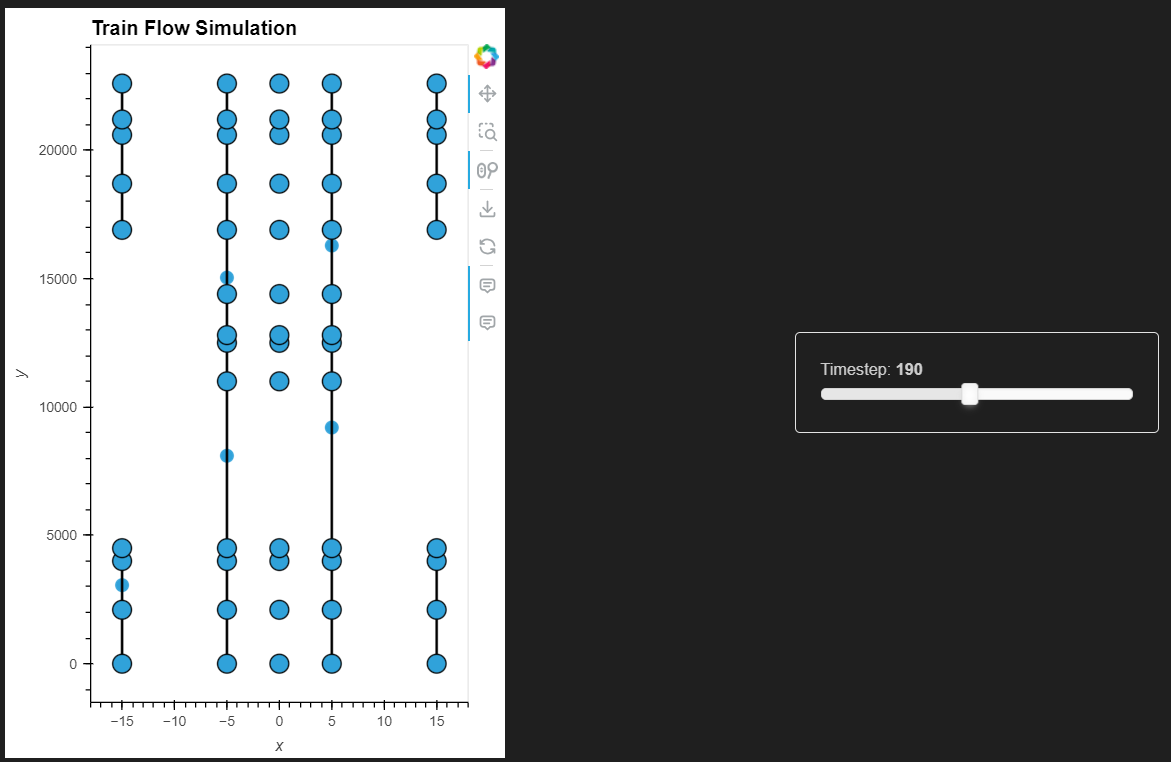

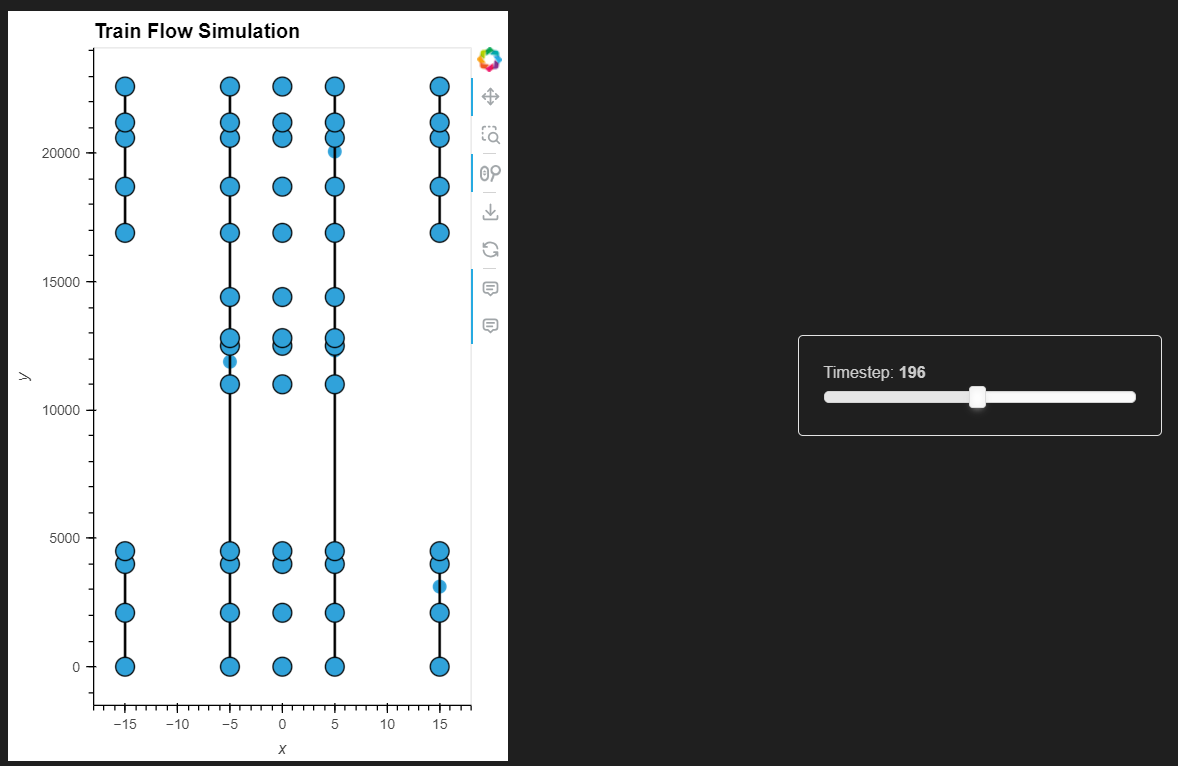

The new situation looks like the following:

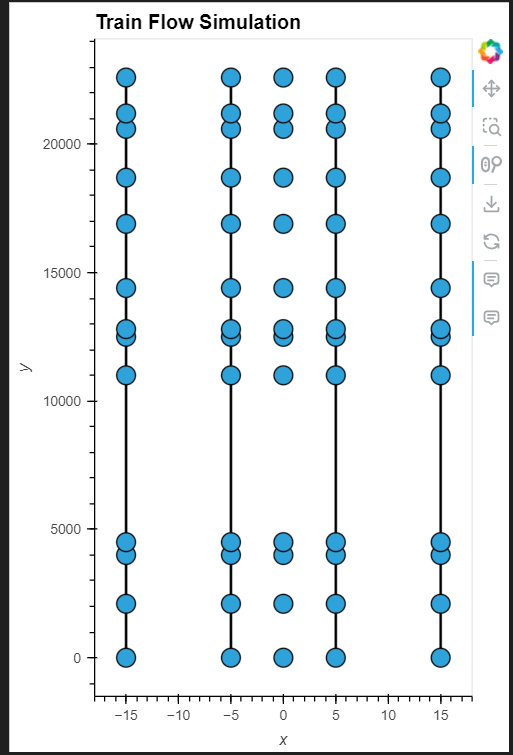

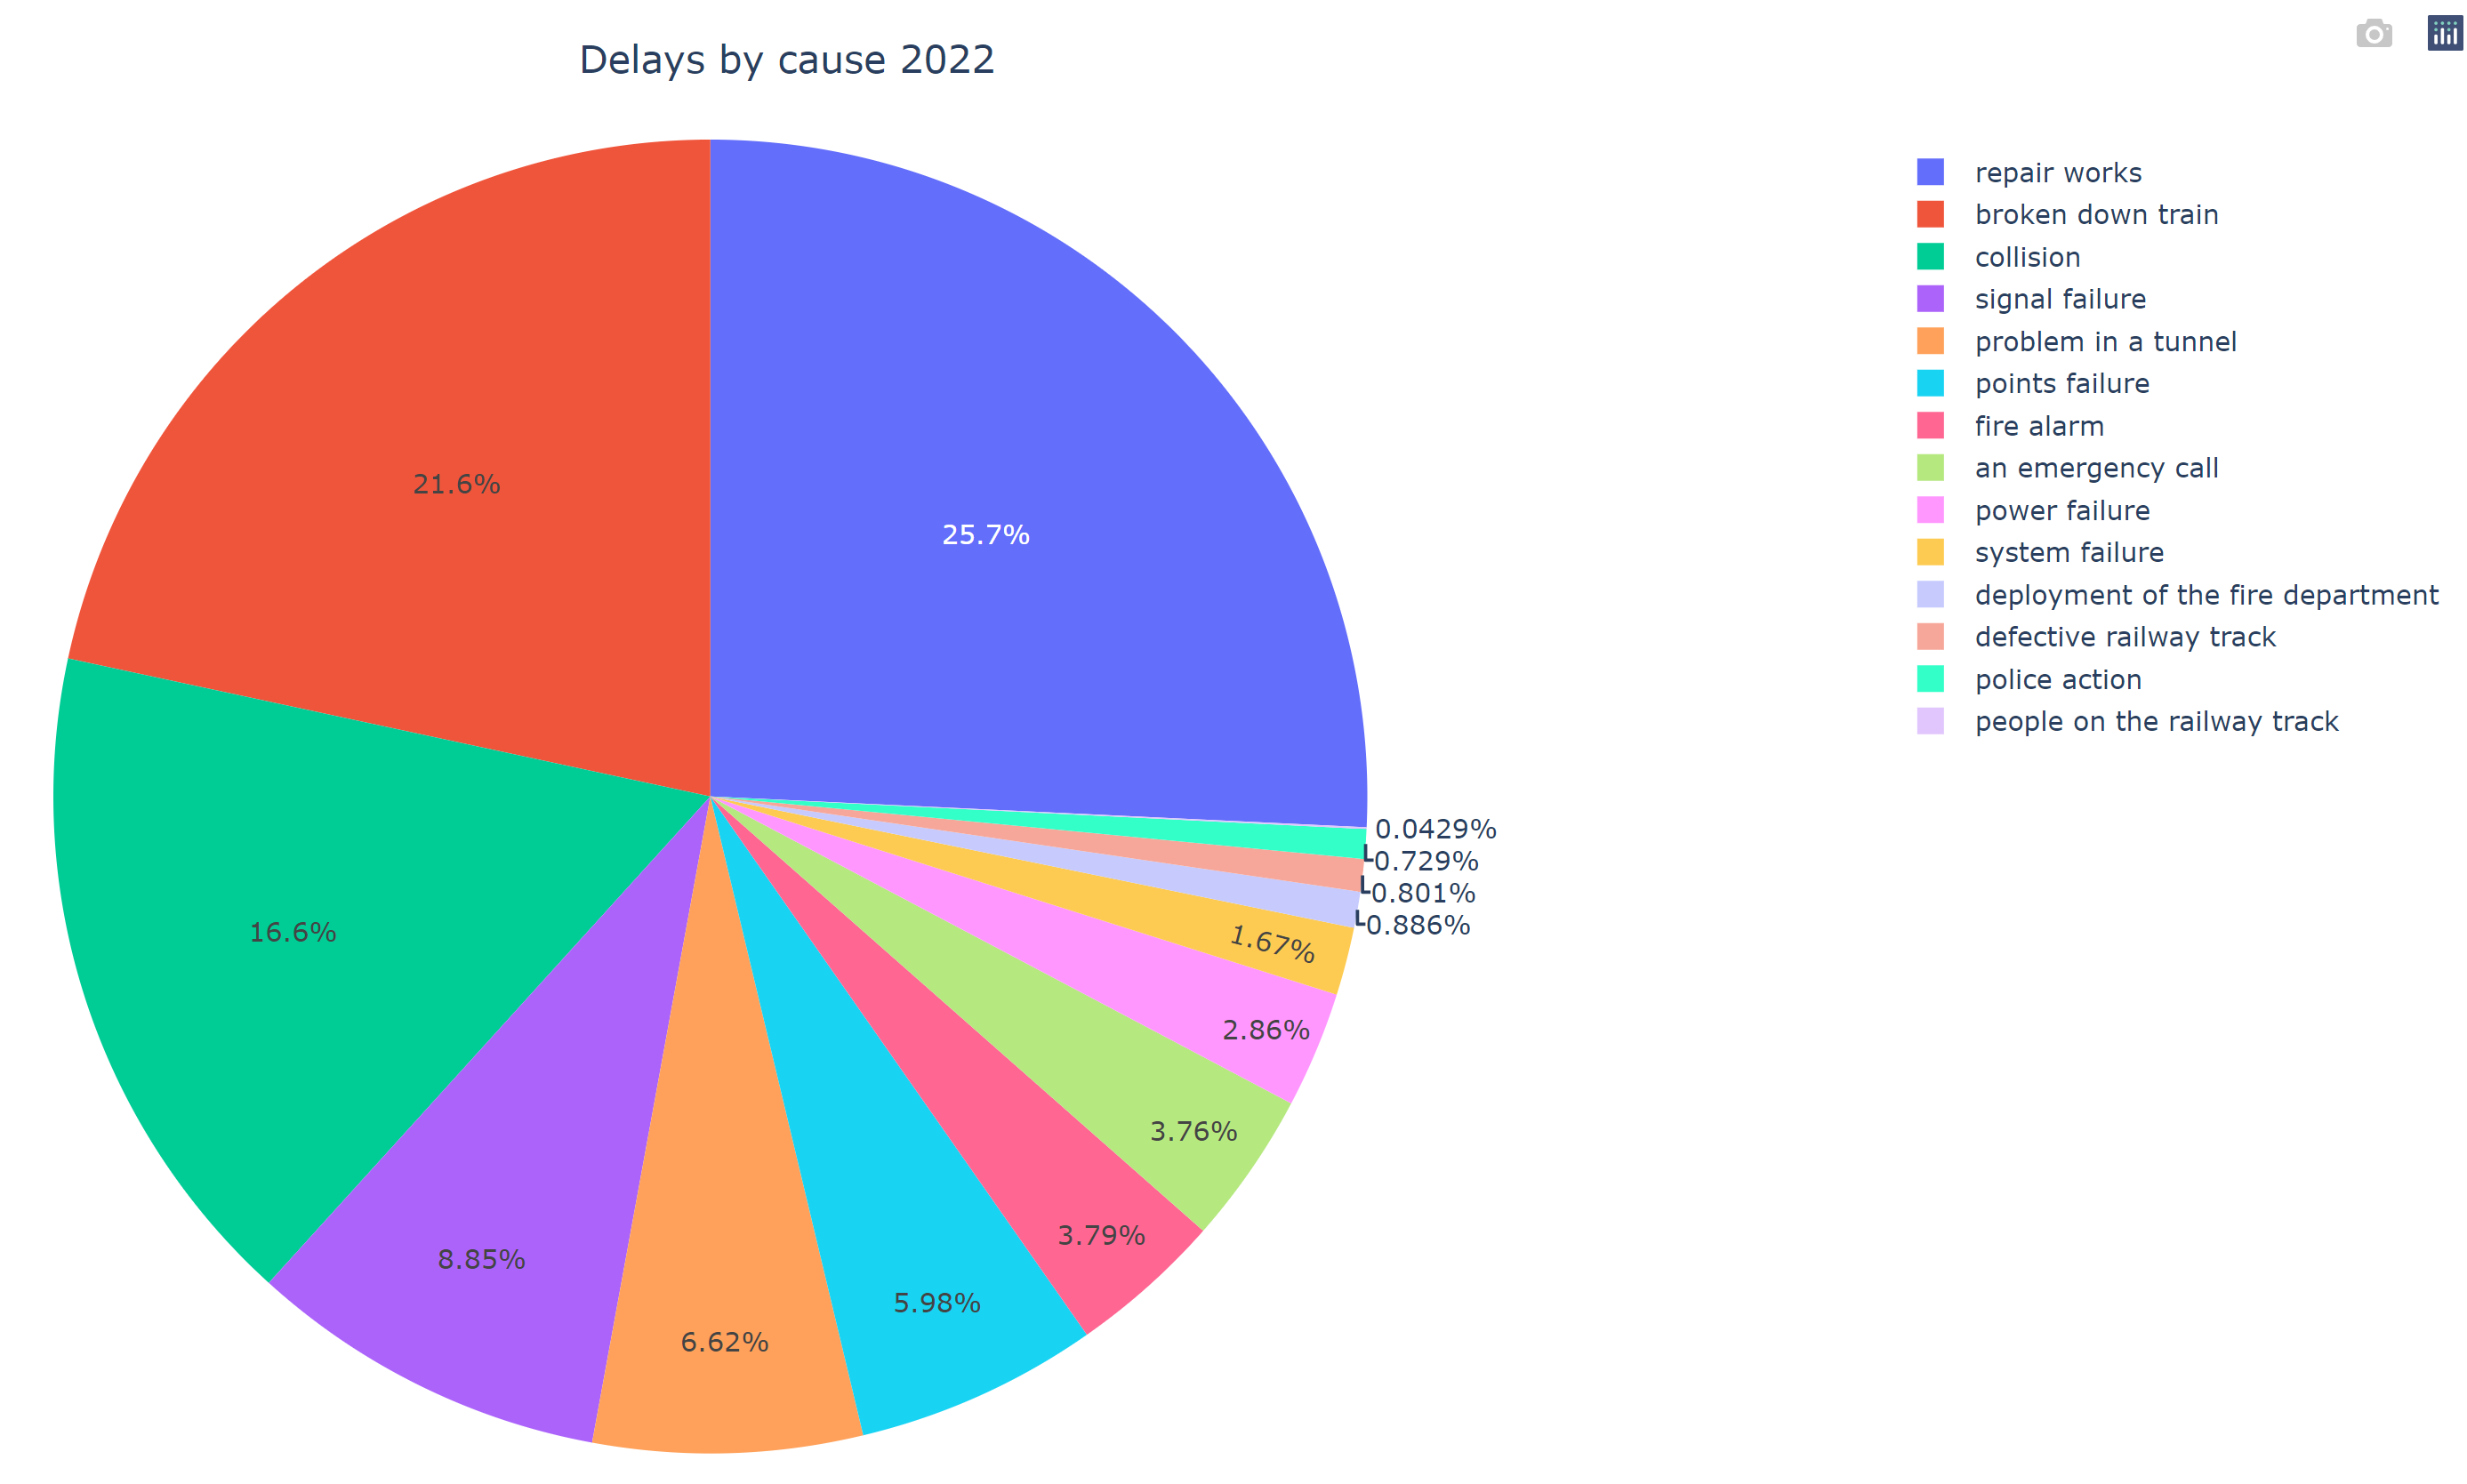

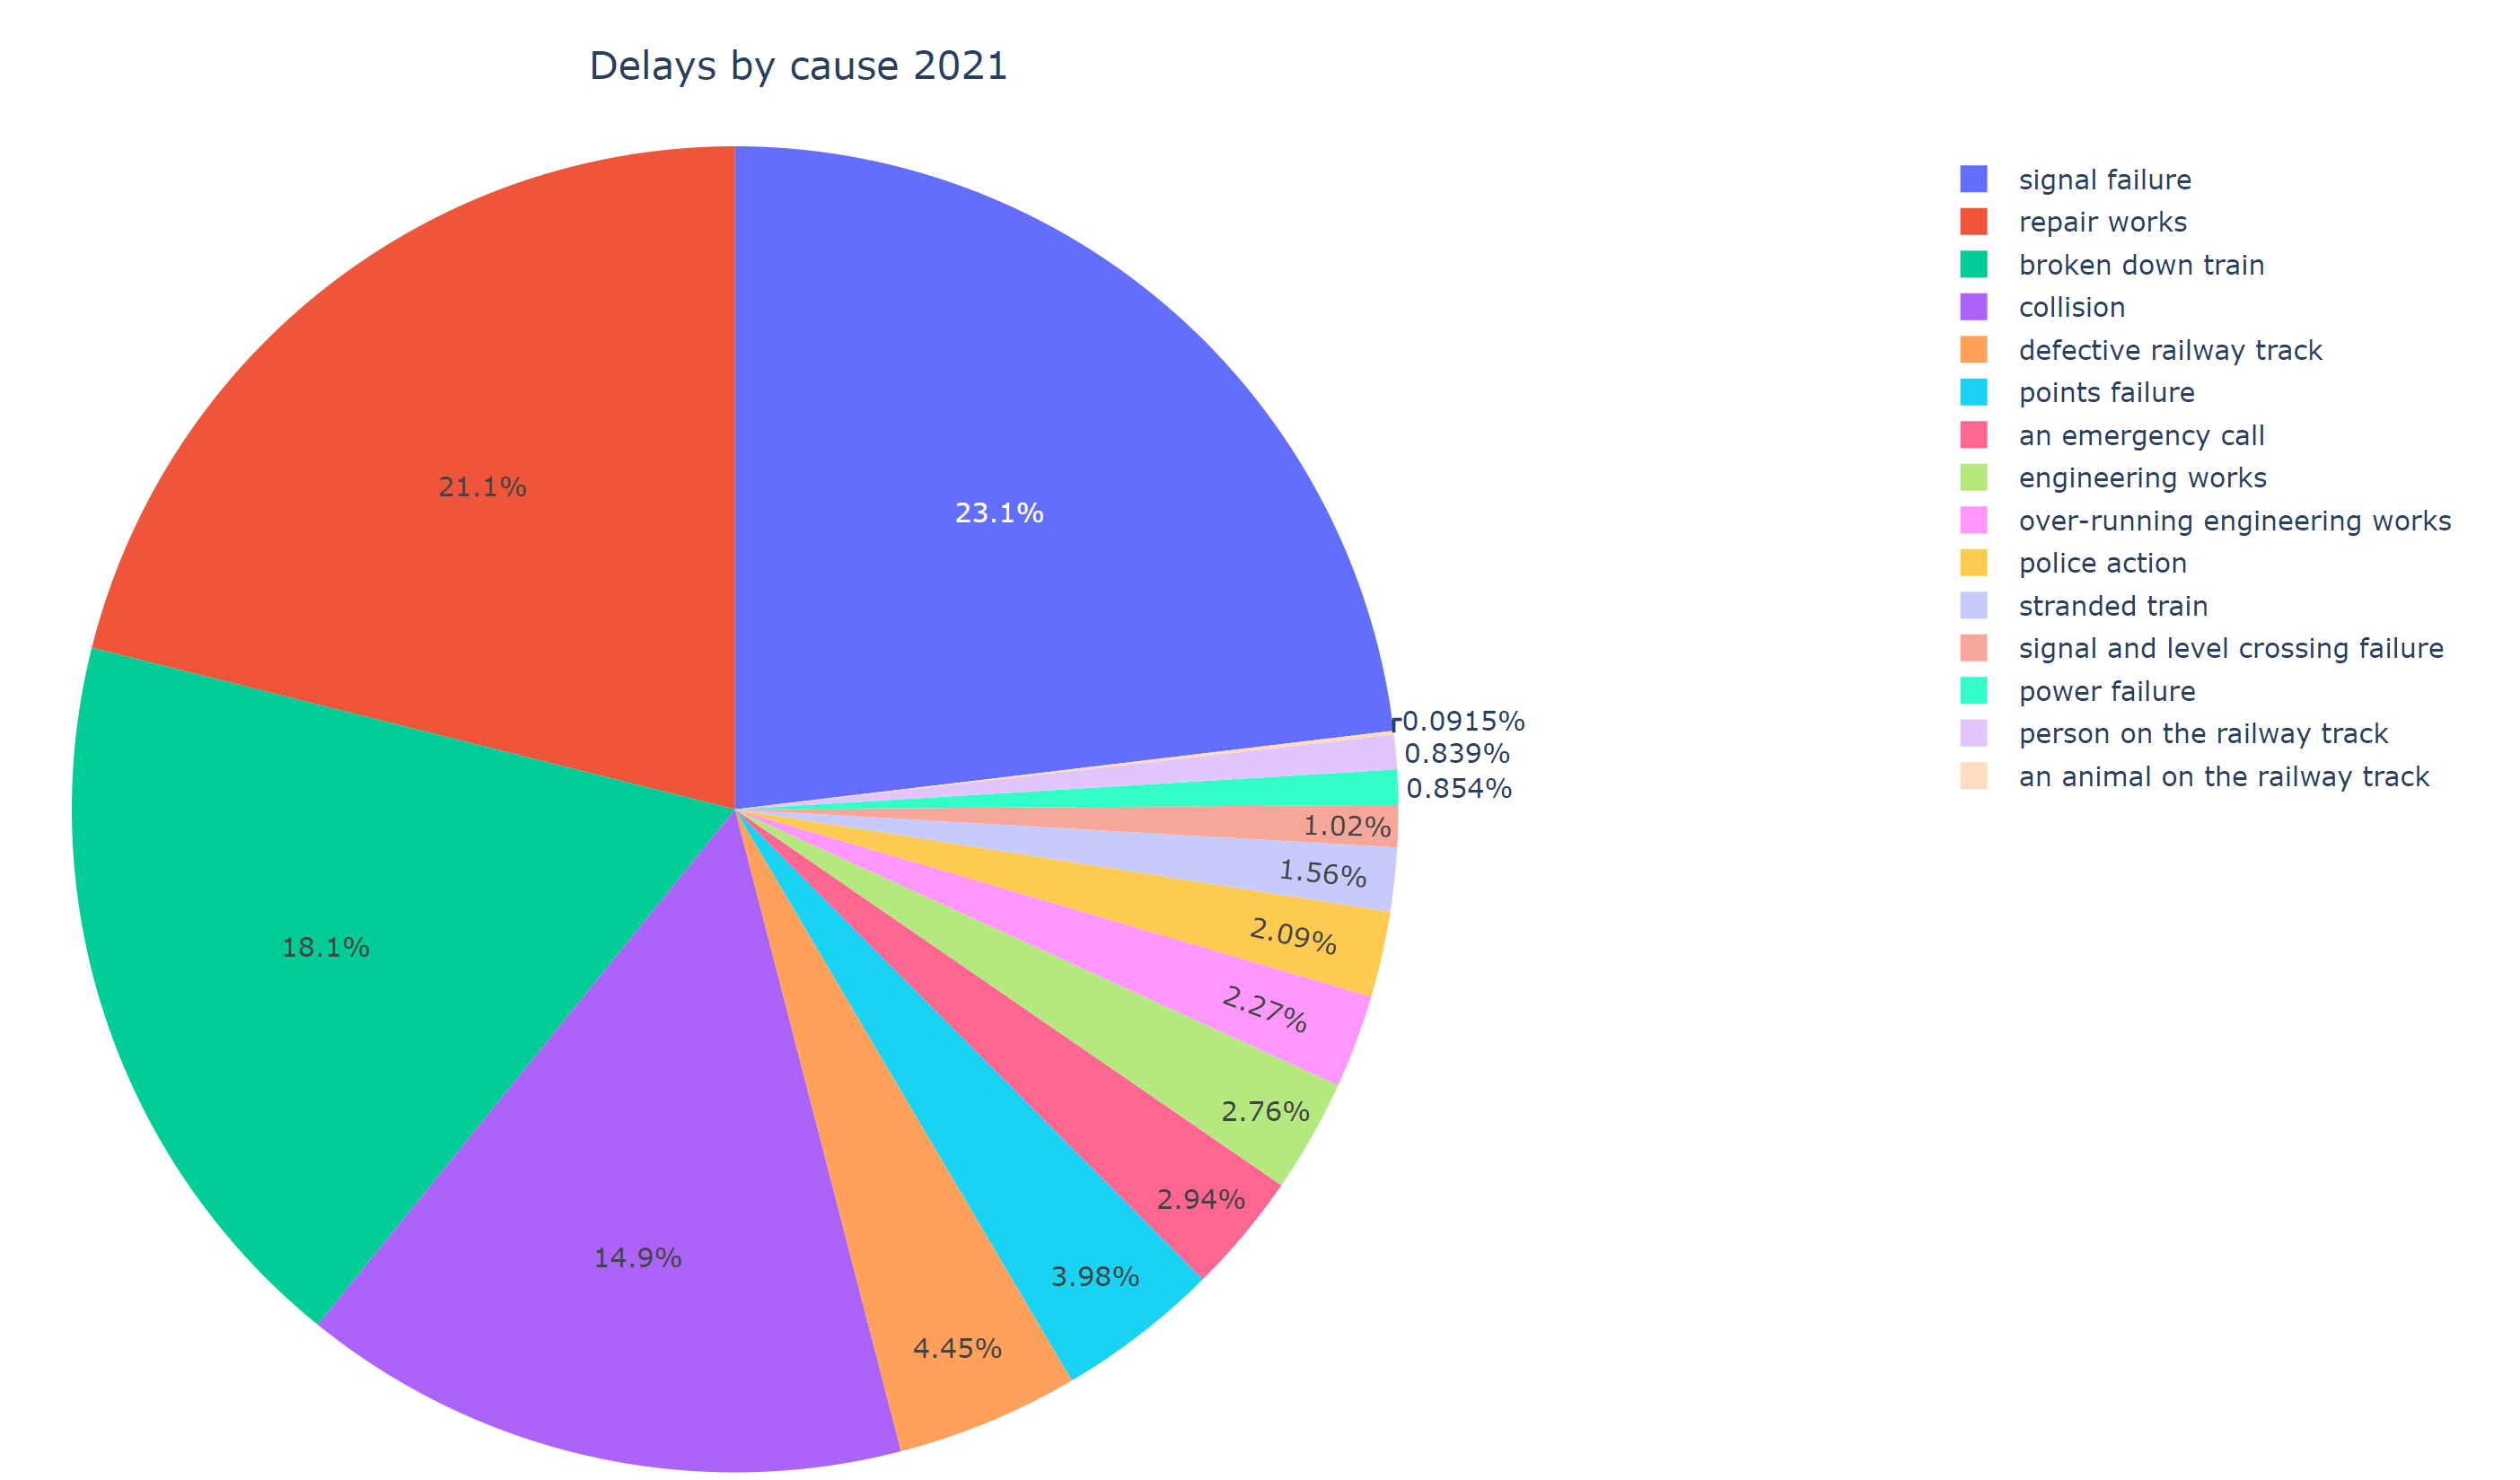

# Implementation approach
We made an agent-based model, with trains as the agents. As seen by running the code in the file main.py. The trains are moving along the tracks, the distribution of the tracks, switches and stations are based on real-world data. All these locations are programmed in network.py. The information about the behaviour of the trains is writen in physical_elements.py for the original situation and physical_elements_new_situation.py for the renewed situation, with the use of additional train tracks. The used timetable is processed in the file exceltrains_to_code.py, the results are used in physical_elements.py to make the trains move based on the timetable. In the picture below the railway network is shown for the current situation, showing only double tracks were it is in use nowadays.  

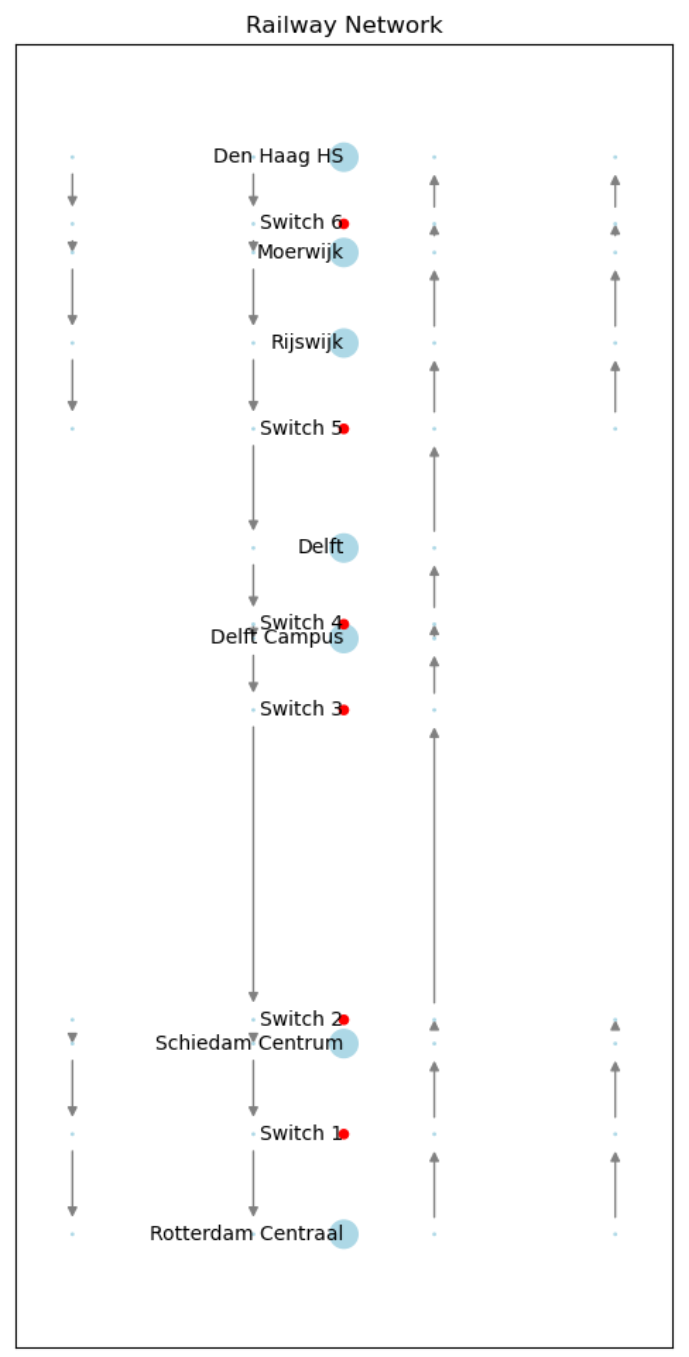

# Conclusion
With performing this assignment we had the aim to investigate the impact of the two additional train tracks that are currently built between Schiedam and Rijswijk. We used an agent-based model to visualize the changes and to give insight into the movement of the trains. To make the model as close to the real-world situation, we used timetables provides by the NS to run the model. Besides using the timetables, the real-world distances and locations of stations and switches are used to scale the model. 
By running barchart.py the arrival time in the new situation is shown as difference to the old situation which can be seen below. Indexes without a bar, arrive at exact the same time as in the original situation. Overall there is just 1 train with a delay of half a minute, and 32 trains that arrive earlier. 

We conclude that with the additional train tracks between Rijswijk and Schiedam, the capacity on this route could be increased by rearranging the timetable and add trains were possible. Due to lower delays, the experience for commuters will increase. 

In future projects ProRail or the NS could use this model to gain insight in different influences on the reliability and delays on this route. Àdditional improvements could be tested, or for example the influence of closing a station due to construction work. The approach of this model could be implemented on all routes in the Dutch railway system. Gaining massive insight to improve commuter experience and decrease overall delys.

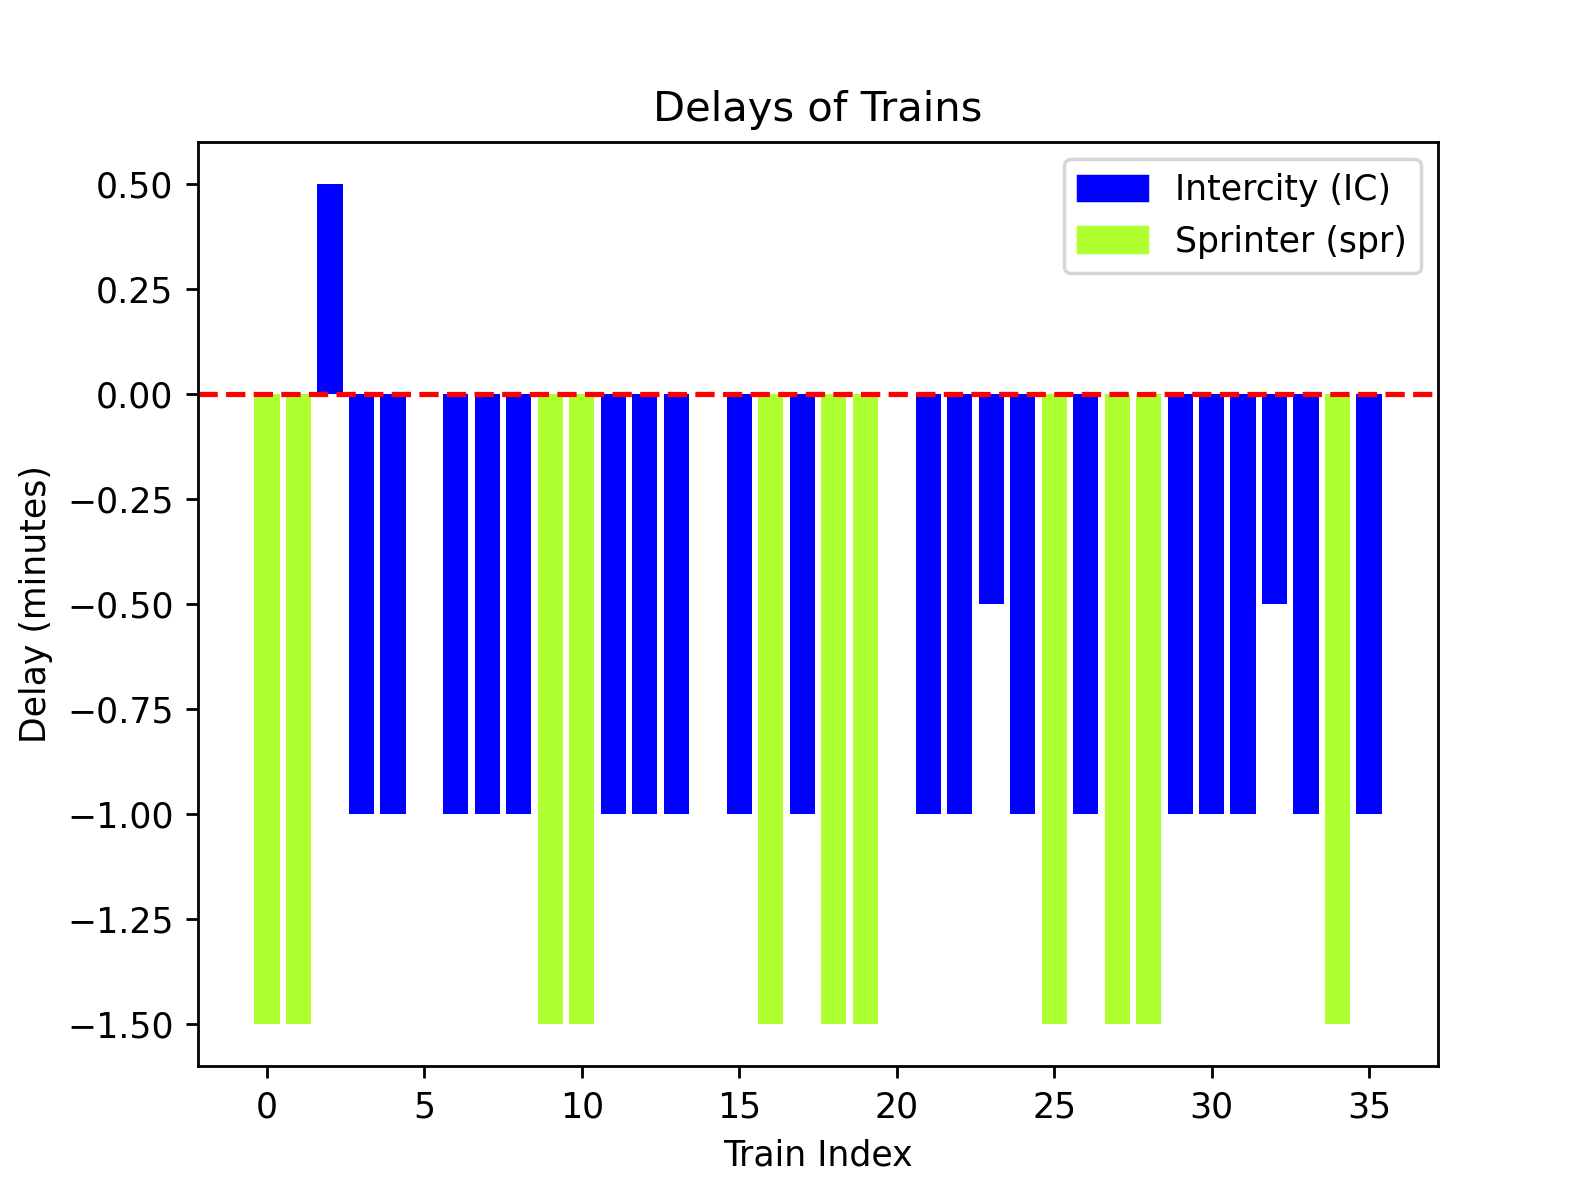